## Eliminate from (general) A to (upper triangular) U

Demonstrate Gaussian Elimination (page 51 of GS)

(Reminder: Julia programming syntax will not be tested in this class, but that doesn't mean you can't learn from
watching the code being executed)

(If you are familiar with Jupyter notebooks and wish to execute yourself, you can download this notebook 
using the download button in the upper right, but WARNING: right click to "download as", or OPTION-click (MAC) or ALT-Click (Linux and Windows I think) on the download icon, or you won't get an ipynb file.) You can then drag into Jupyter.

In [2]:
using Plots

In [3]:
# nice viz for matrices
function lookat(A; redrow=0, rounding=2, showtext=true)
  n = size(A,1)
  plot(legend=false, axis=false)
  rowcolor = redrow > 0 ? :red : :black  
  for i=1:n, j=1:n  
      scatter!( [j],[i], ann=  showtext ? (j,i,round(A[i,j],digits=rounding), :white ) : (j,i,"") ,
                color=abs(A[i,j]) > .0001 ? (i==redrow ? rowcolor : :black) : :white, 
                marker=:square, markersize=30, aspectratio=1, yflip=true, yaxis=[.5,n+.5],xaxis=[.5,n+.5])
  end
  plot!()
end

lookat (generic function with 1 method)

In [4]:
A = rand(1.0:9,4,4)

4×4 Matrix{Float64}:
 2.0  6.0  4.0  5.0
 5.0  4.0  5.0  8.0
 4.0  5.0  2.0  4.0
 1.0  7.0  3.0  4.0

In [5]:
L = fill(0.0,4,4)

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

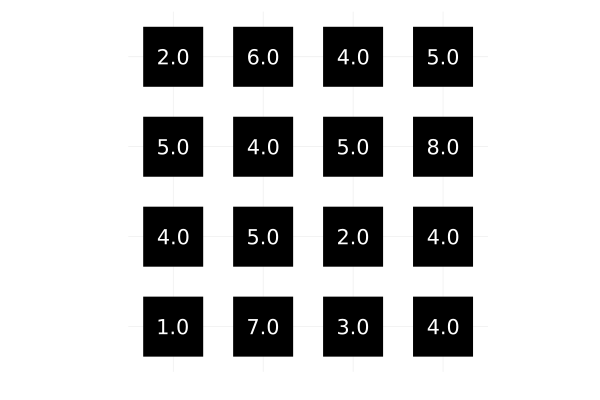

In [6]:
lookat(A)

## What multiple of row 1 must we subtract from row 2 to zero out the (2,1) entry?

In [7]:
L[2,1] = A[2,1] / A[1,1]

2.5

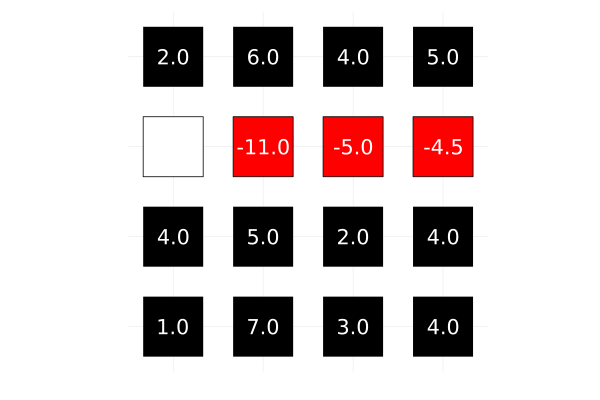

In [8]:
# A[2,:] = A[2,:] - L[2,1] * A[1,:]
A[2,:] -= L[2,1] * A[1,:] # subtract that multiple of the first row from the second
lookat(A, redrow=2)

## What multiple of row 1 must we subtract from row 3 to zero out the (3,1) entry?

In [9]:
L[3,1] = A[3,1] / A[1,1]

2.0

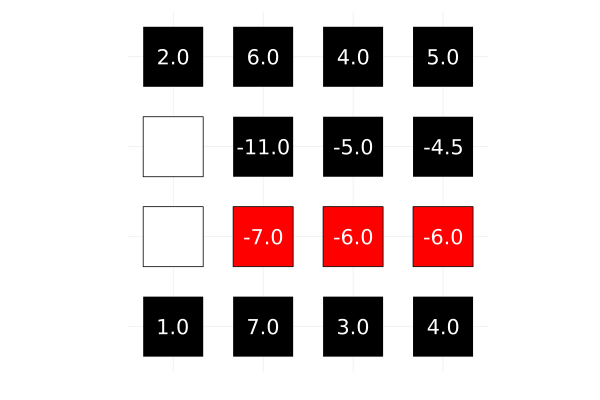

In [10]:
A[3,:] -= L[3,1] * A[1,:]
lookat(A, redrow=3)

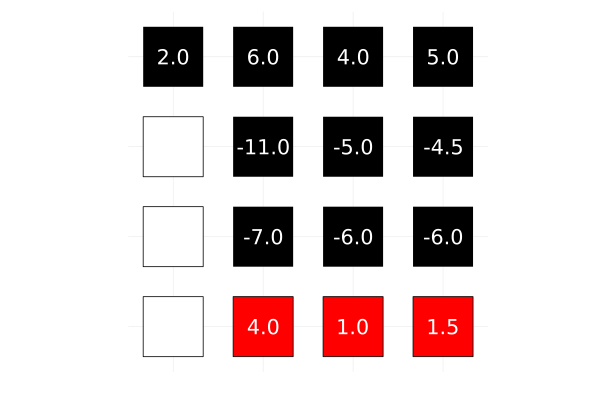

In [11]:
L[4,1] = A[4,1] / A[1,1]
A[4,:] -= L[4,1] * A[1,:]
lookat(A, redrow=4)

In [12]:
L[3,2] = A[3,2] / A[2,2]

0.6363636363636364

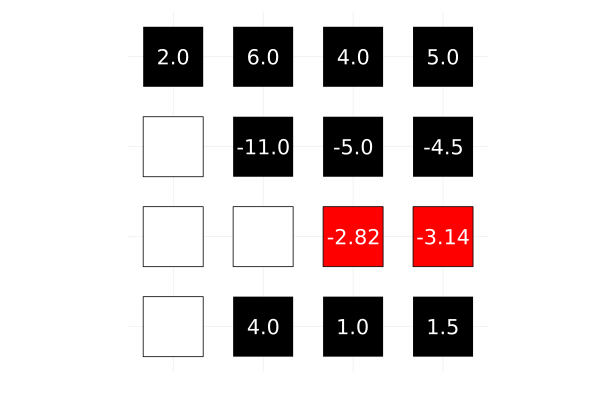

In [13]:
A[3,:] -= L[3,2] * A[2,:]; lookat(A, redrow=3)

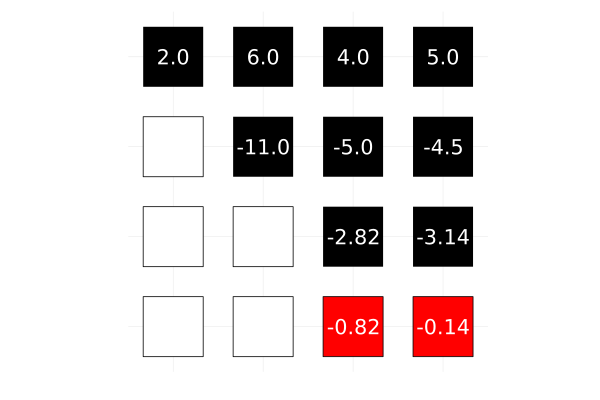

In [14]:
L[4,2] = A[4,2] / A[2,2]; A[4,:] -= L[4,2] * A[2,:]; lookat(A, redrow=4)

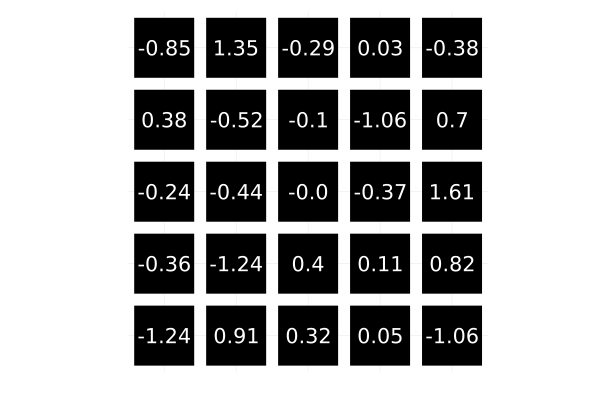

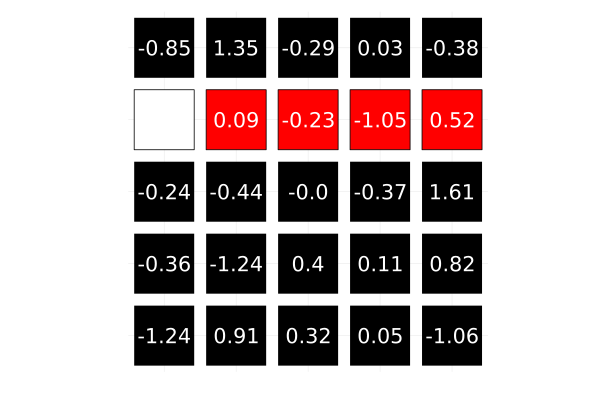

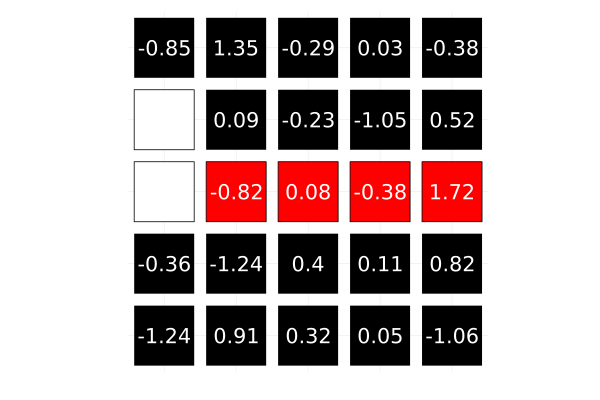

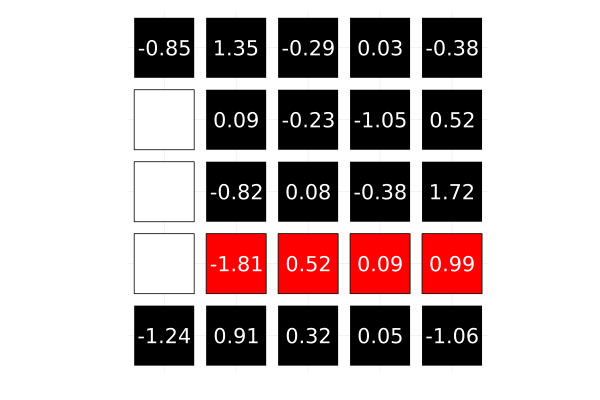

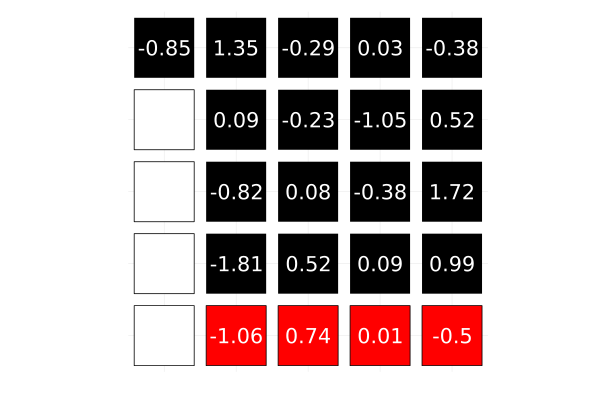

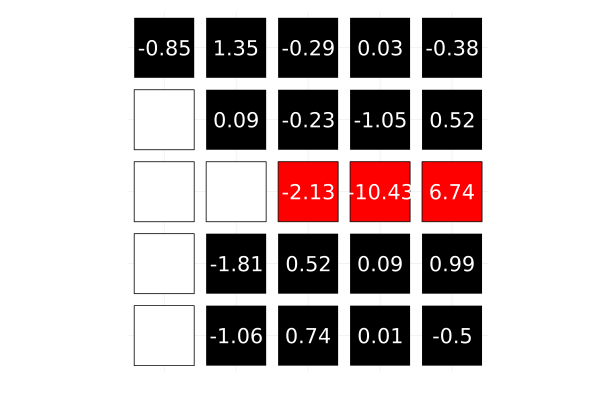

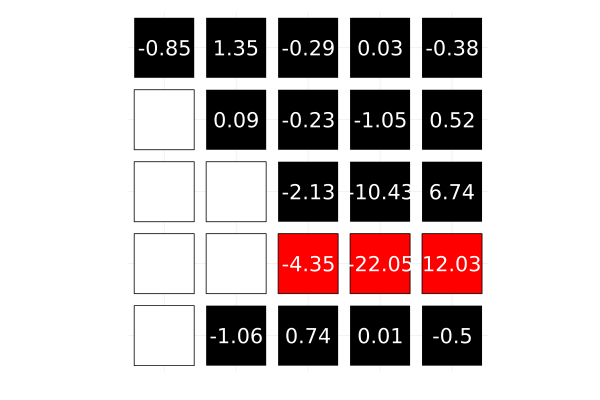

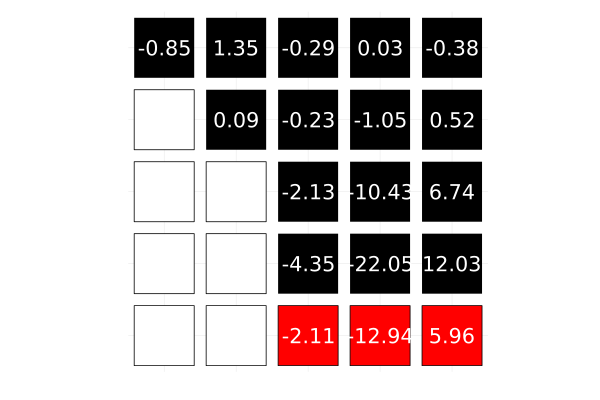

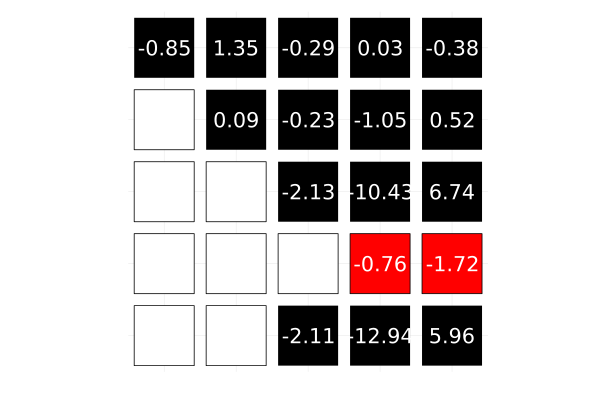

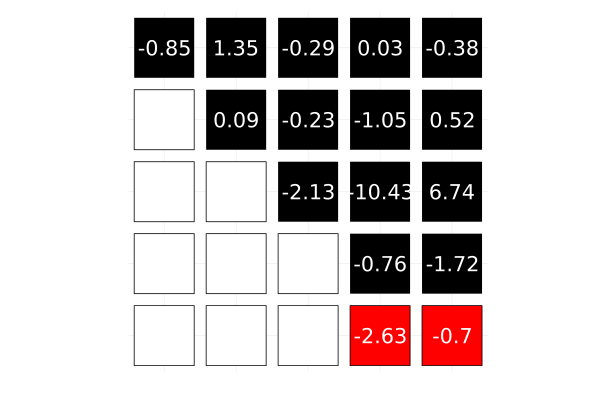

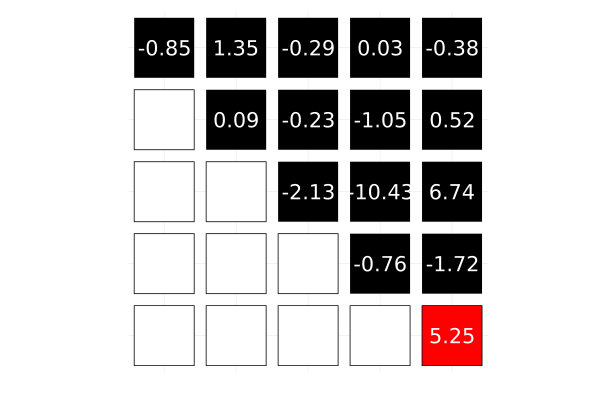

In [15]:
n = 5
A = randn(n,n)
L = fill(0.0,n,n)
display(lookat(A))
for j=1:n, i=(j+1):n
        L[i,j] = A[i,j]/A[j,j]
        A[i,:] -= L[i,j] * A[j,:]
        display(lookat(A,redrow=i))
end

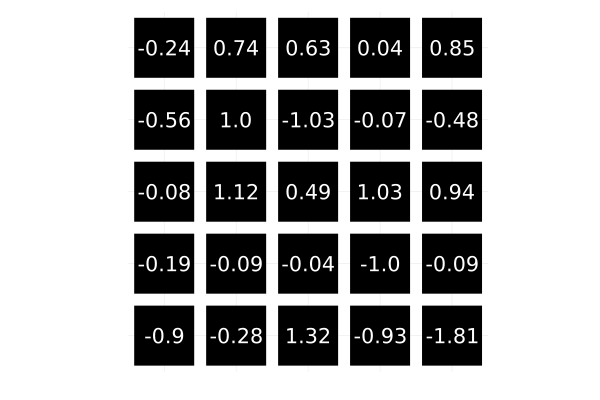

In [16]:
n = 5
A = randn(n,n)
L = fill(0.0,n,n)
Akeep = [copy(A)]
row = [0]
display(lookat(A))
for j=1:n, i=(j+1):n
        L[i,j] = A[i,j]/A[j,j]
        A[i,:] -= L[i,j] * A[j,:]
        push!(Akeep,copy(A))
        push!(row,i)
end

In [18]:
using Interact

[ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1] (cache misses: wrong dep version loaded (2))

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up
┌ Warning: Module JSON with build ID fafbfcfd-2932-7cd5-1b3c-e922faa373c9 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:2641
┌ Info: Skipping precompilation due to precompilable error. Importing Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up
[ Info: Precompiling InteractBase [d3863d7c-f0c8-5437-a7b4-3ae773c01009] (cache misses: wrong dep version loaded (2))

SYSTEM: caught exception of type :MethodError while trying to print 

LoadError: LoadError: UndefVarError: `Writer` not defined in `JSON`
Suggestion: check for spelling errors or missing imports.
in expression starting at /home/kokugo/.julia/packages/WebIO/8Xm9p/src/syntax.jl:229
in expression starting at /home/kokugo/.julia/packages/WebIO/8Xm9p/src/WebIO.jl:1
in expression starting at /home/kokugo/.julia/packages/InteractBase/8TTmI/src/InteractBase.jl:1
in expression starting at /home/kokugo/.julia/packages/Interact/PENUy/src/Interact.jl:1

In [20]:
@manipulate for i=slider(1:length(Akeep),value=1)
      lookat(Akeep[i],redrow=row[i],showtext=true)
end

LoadError: LoadError: UndefVarError: `@manipulate` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
in expression starting at In[20]:1

In [21]:
using LinearAlgebra

In [22]:
U =  Akeep[end]
A =  Akeep[1]
L += I

5×5 Matrix{Float64}:
 1.0        0.0        0.0        0.0      0.0
 2.34724    1.0        0.0        0.0      0.0
 0.334732  -1.1729     1.0        0.0      0.0
 0.776677   0.898516  -0.644744   1.0      0.0
 3.76523    4.13594   -3.4952    -6.99738  1.0

In [23]:
L*U

5×5 Matrix{Float64}:
 -0.239307    0.740687    0.631772    0.0420727   0.853815
 -0.56171     0.996805   -1.0297     -0.0710309  -0.48404
 -0.0801036   1.11794     0.487167    1.03159     0.943236
 -0.185864   -0.0912114  -0.0446089  -1.00153    -0.0942473
 -0.901045   -0.279036    1.32361    -0.92694    -1.80865

In [24]:
A

5×5 Matrix{Float64}:
 -0.239307    0.740687    0.631772    0.0420727   0.853815
 -0.56171     0.996805   -1.0297     -0.0710309  -0.48404
 -0.0801036   1.11794     0.487167    1.03159     0.943236
 -0.185864   -0.0912114  -0.0446089  -1.00153    -0.0942473
 -0.901045   -0.279036    1.32361    -0.92694    -1.80865

In [25]:
L*U ≈ A

true